In [1]:
from learning_plasticity import BCM_tf

In [ ]:
learning_plasticity.

In [27]:
import tensorflow as tf
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
import pandas as pd
import BCM
import data_loader
% matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [32]:
import numpy as np

In [57]:
class BCM:
    def __init__(self, eta = 0.1, n_epoch=10, n_output=1, batch=1, tau=100.0, thres=0, p = 2,random_state = None, shuffle = True, nonlinear = 'Relu', obj_type = 'QBCM',decay = 0.0):
        self.eta = eta
        self.n_epoch = n_epoch
        self.n_output = n_output
        self.batch = batch
        self.tau = tau  
        self.p = p    
        self.shuffle = shuffle
        self.nonlinear = nonlinear
        self.obj_type = obj_type
        self.y_thres = []      # Storaged y for studying effect of threshold
        self.decay = decay

        if random_state:
            np.random.seed(random_state)
    
    def build(self, input):
        with tf.variable_scope('BCM'):
            n_output = self.n_output
            n_input = input.get_shape().as_list()[1]
            w = self.w = tf.get_variable('weight', shape=[n_input, n_output], initializer=tf.random_normal_initializer())
            thres = self.thres = tf.get_variable('threshold', shape=[n_output], initializer=tf.constant_initializer())
            x = input
            y = tf.matmul(x, w)
            y = tf.sigmoid(y)
            x_t = tf.transpose(x, [1, 0])
            
            eta  = self.eta
            decay = self.decay
            
            dsigmoid = tf.sigmoid(y) * (1 - tf.sigmoid(y))
            
            delta_w = eta * x_t * dsigmoid * y * (y - thres) - eta * decay * w
            
            new_w = w + delta_w
            
            self.update_w = tf.assign(w, new_w)
            
            h = np.exp(-1/self.tau)
            new_threshold = thres * h + tf.reduce_mean(tf.pow(y, self.p) * (1 - h))
            self.update_threshold = tf.assign(thres, new_threshold)

In [58]:
bcm_model = BCM()

g = tf.Graph()
with g.as_default():
    input_ = tf.placeholder(tf.float32, [1, 2])
    bcm_model.build(input_)
    
    sess = tf.Session()
    
    sess.run(tf.initialize_all_variables())

In [59]:
sess.run(bcm_model.w)

array([[ 2.15192175],
       [ 0.1134319 ]], dtype=float32)

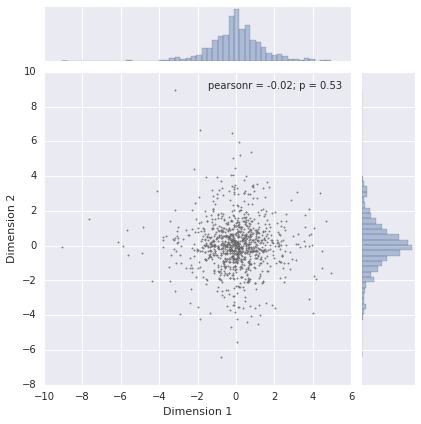

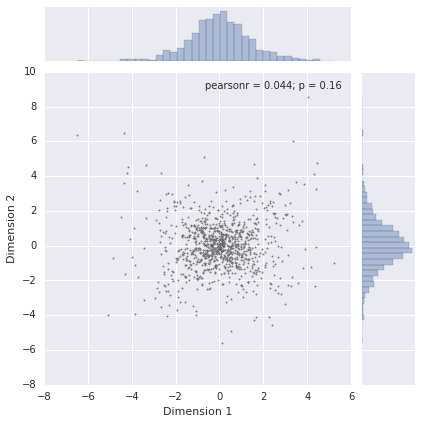

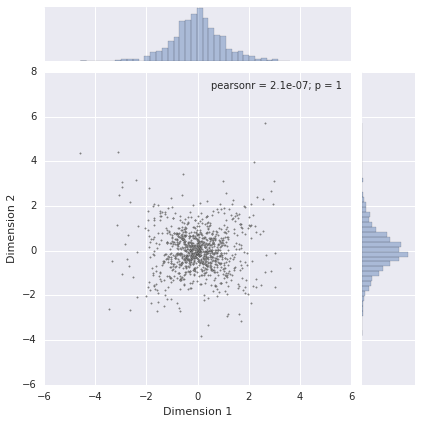

In [60]:
Laplace_rt_wt,Laplace_w = data_loader.load_laplace(loc = 0, scale = 1, sample_size = 1000,dimension = 2,skew = False, whiten = True, rotation = True)

In [67]:
for i in range(Laplace_rt_wt.shape[0]):
    sample = Laplace_rt_wt[i]
    sample = sample[np.newaxis, :]
    sess.run([bcm_model.update_w, bcm_model.update_threshold], feed_dict={input_:sample})
    w_val = sess.run(bcm_model.w)

In [53]:
np.select?

In [48]:
Laplace_rt_wt.shape

(1000, 2)

In [47]:
data.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'transpose:0' shape=(2, 1000) dtype=float64>>

In [12]:
input = tf.placeholder(tf.float32, [2])
bcm_model(input)

ValueError: Variable BCM/weight already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-4-4cd9ad1c34e9>", line 22, in __call__
    w = self.w = tf.get_variable('weight', shape=[n_input, n_output], initializer=tf.random_normal_initializer())
  File "<ipython-input-7-0614b861a1c7>", line 2, in <module>
    bcm_model(input)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
z = x.dot(y) + 5
print(z)

[[ 3.53321045]
 [ 2.92034776]
 [ 5.09904405]
 [ 3.75759088]
 [ 5.91381394]]


In [16]:
x_ = tf.placeholder(tf.float32, [5, 5])
y_ = tf.placeholder(tf.float32, [5, 1])
c_ = tf.placeholder(tf.float32, [])
m = tf.matmul(x_, y_, name='product')
z = m + c_

In [17]:
sess = tf.Session()

In [19]:
sess.run(z, feed_dict={x_: x, y_: y, c_:c})

array([[ 3.53321052],
       [ 2.92034769],
       [ 5.09904385],
       [ 3.75759077],
       [ 5.91381359]], dtype=float32)